In [10]:
from pyspark.sql import SparkSession
# import pandas as pd
# To run the code on local machine or on server
server_mode = False

spark_session = SparkSession.builder.appName('Project_G1').getOrCreate()

In [11]:
spark_session

In [61]:
import os

df_list = {}
for fn in os.listdir("./uber-tlc-foil-response/other-FHV-data/"):
    f = os.path.join("./uber-tlc-foil-response/other-FHV-data/", fn)
    df_list[fn] = spark_session.read.option("header", "true").csv(f)
df_list

{'Firstclass_B01536.csv': DataFrame[DATE: string, TIME: string, PICK UP ADDRESS: string],
 'other-FHV-data-jan-aug-2015.csv': DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string],
 'Prestige_B01338.csv': DataFrame[DATE: string, TIME: string, PICK UP ADDRESS: string],
 'Lyft_B02510.csv': DataFrame[time_of_trip: string, start_lat: string, start_lng: string, _c3: string],
 'Highclass_B01717.csv': DataFrame[DATE: string, TIME: string, PU_Address: string],
 'Skyline_B00111.csv': DataFrame[Date: string, Time: string,     Street_Address : string,     City_State : string, _c4: string, _c5: string],
 'Carmel_B00256.csv': DataFrame[Date: string, Time: string, PU_Adress: string, Base_No: string],
 'Federal_02216.csv': DataFrame[Date: string, Time: string, PU_Address2: string, DO_Address: string, Routing Details: string, PU_Address5: string, Status: string],
 'Diplo_B01196.csv': DataFrame[Date: string, Time: string, PU_Address: string],
 'Dial7_B0088

In [62]:
df_list['other-FHV-data-jan-aug-2015.csv'].printSchema()
df_list['other-FHV-data-jan-aug-2015.csv'].show(5)

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)

+--------------------+-----------+---------+----+------------+---------------+------------------+
|                 _c0|        _c1|      _c2| _c3|         _c4|            _c5|               _c6|
+--------------------+-----------+---------+----+------------+---------------+------------------+
|                null|       null|     null|null|        null|           null|              null|
|Base Aggregate Re...|       null|     null|null|        null|           null|              null|
|                null|       null|     null|null|        null|           null|              null|
|                null|       null|     null|null|        null|           null|              null|
|                null|Base Number|Base Name|null|Pick Up Date|N

22/03/16 16:44:07 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , , , , , , 
 Schema: _c0, _c1, _c2, _c3, _c4, _c5, _c6
Expected: _c0 but found: 
CSV file: file:///home/ubuntu/uber-tlc-foil-response/other-FHV-data/other-FHV-data-jan-aug-2015.csv


In [63]:
sc = spark_session.sparkContext
df_list['other-FHV-data-jan-aug-2015.csv'] = \
        df_list['other-FHV-data-jan-aug-2015.csv'].withColumnRenamed("_c1", "Base_Number")\
       .withColumnRenamed("_c2", "Base_Name").withColumnRenamed("_c4", "Pick_Up_Date")\
       .withColumnRenamed("_c5", "Number_of_Trips").withColumnRenamed("_c6", "Number_of_Vehicles")

df_list['other-FHV-data-jan-aug-2015.csv'] = \
        SparkSession(sc).createDataFrame(df_list['other-FHV-data-jan-aug-2015.csv']\
                              .tail(df_list['other-FHV-data-jan-aug-2015.csv'].count()-1)\
                              ,df_list['other-FHV-data-jan-aug-2015.csv'].schema)

22/03/16 16:44:09 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , , , , , , 
 Schema: _c0, _c1, _c2, _c3, _c4, _c5, _c6
Expected: _c0 but found: 
CSV file: file:///home/ubuntu/uber-tlc-foil-response/other-FHV-data/other-FHV-data-jan-aug-2015.csv


In [64]:
df_list['other-FHV-data-jan-aug-2015.csv']

DataFrame[_c0: string, Base_Number: string, Base_Name: string, _c3: string, Pick_Up_Date: string, Number_of_Trips: string, Number_of_Vehicles: string]

In [65]:
df_list['Lyft_B02510.csv'] = df_list['Lyft_B02510.csv'].na.drop()
df_list['Federal_02216.csv'] = df_list['Federal_02216.csv']\
                        .na.fill('UNKOWN')

df_list['American_B01362.csv'] = \
        df_list['American_B01362.csv'].withColumnRenamed("PICK UP ADDRESS", "PICK_UP_ADDRESS")
df_list['Prestige_B01338.csv'] = \
        df_list['Prestige_B01338.csv'].withColumnRenamed("PICK UP ADDRESS", "PICK_UP_ADDRESS")

df_list['Firstclass_B01536.csv'] = \
        df_list['Firstclass_B01536.csv'].withColumnRenamed("PICK UP ADDRESS", "PICK_UP_ADDRESS")
df_list['Federal_02216.csv'] = \
        df_list['Federal_02216.csv'].withColumnRenamed("Routing Details", "Routing_Details")

df_list['Skyline_B00111.csv'] = \
df_list['Skyline_B00111.csv'] = \
        df_list['Skyline_B00111.csv'].withColumnRenamed("    City_State ", "City_State")
df_list['Skyline_B00111.csv'].printSchema()

root
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |--     Street_Address : string (nullable = true)
 |-- City_State: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)



In [66]:
from pyspark.sql.types import StructType, StructField, StringType
columns_to_drop = ['_c3','_c4','_c5']
df_list['American_B01362.csv'] = \
    df_list['American_B01362.csv'].drop(*columns_to_drop)
df_list['American_B01362.csv'].show(2)
col_names = df_list['American_B01362.csv'].schema.names
mySchema = StructType([StructField(c, StringType()) for c in col_names])
FHV_10_companies_data = SparkSession(sc).createDataFrame(data=[], schema=mySchema)
FHV_10_companies_data.show()

+--------+-----------+--------------------+
|    DATE|       TIME|     PICK_UP_ADDRESS|
+--------+-----------+--------------------+
|7/1/2014|12:00:00 AM| 874 E 139th St M...|
|7/1/2014|12:01:00 AM| 628 E 141st St M...|
+--------+-----------+--------------------+
only showing top 2 rows

+----+----+---------------+
|DATE|TIME|PICK_UP_ADDRESS|
+----+----+---------------+
+----+----+---------------+



In [67]:
FHV_10_companies_data = FHV_10_companies_data.union(df_list['American_B01362.csv'])
df_list['American_B01362.csv'].count()

91712

In [68]:
tmp = df_list['Carmel_B00256.csv'].drop('Base_No')
tmp = tmp.withColumnRenamed("PU_Adress", "PICK_UP_ADDRESS")
df_list['Carmel_B00256.csv'] = tmp
FHV_10_companies_data = FHV_10_companies_data.union(tmp)
df_list['Carmel_B00256.csv'].count()

256519

In [69]:
columns_to_drop = ['State','PuFrom', 'Address']
tmp = df_list['Dial7_B00887.csv'].drop(*columns_to_drop)
tmp = tmp.withColumnRenamed("Street", "PICK_UP_ADDRESS")
df_list['Dial7_B00887.csv'] = tmp
FHV_10_companies_data = FHV_10_companies_data.union(tmp)
df_list['Dial7_B00887.csv'].count()

194992

In [70]:
tmp = df_list['Diplo_B01196.csv'].withColumnRenamed("PU_Address", "PICK_UP_ADDRESS")
df_list['Diplo_B01196.csv'] = tmp
FHV_10_companies_data = FHV_10_companies_data.union(tmp)
df_list['Diplo_B01196.csv'].count()

98550

In [71]:
columns_to_drop = ['DO_Address','Routing_Details', 'Status', 'PU_Address2']
tmp = df_list['Federal_02216.csv'].drop(*columns_to_drop)
tmp = tmp.withColumnRenamed("PU_Address5", "PICK_UP_ADDRESS")
df_list['Federal_02216.csv'] = tmp
FHV_10_companies_data = FHV_10_companies_data.union(tmp)
df_list['Federal_02216.csv'].count()

276

In [72]:
FHV_10_companies_data = FHV_10_companies_data.union(df_list['Firstclass_B01536.csv'])
df_list['Firstclass_B01536.csv'].count()

166769

In [73]:
tmp = df_list['Highclass_B01717.csv'].withColumnRenamed("PU_Address", "PICK_UP_ADDRESS")
df_list['Highclass_B01717.csv'] = tmp
FHV_10_companies_data = FHV_10_companies_data.union(tmp)
df_list['Highclass_B01717.csv'].count()

151925

In [84]:
tmp = df_list['Skyline_B00111.csv'].drop('City_State')
tmp = tmp.withColumnRenamed("    Street_Address ", "PICK_UP_ADDRESS")
columns_to_drop = ["_c3", "_c4", "_c5"]
tmp = tmp.drop(*columns_to_drop)
FHV_10_companies_data = FHV_10_companies_data.union(tmp)
df_list['Skyline_B00111.csv'].count()

127696

In [85]:
FHV_10_companies_data = FHV_10_companies_data.union(df_list['Prestige_B01338.csv'])
df_list['Prestige_B01338.csv'].count()

320641

In [86]:
FHV_10_companies_data.count()

1409080

In [87]:
FHV_10_companies_data.show(20)

+--------+-----------+--------------------+
|    DATE|       TIME|     PICK_UP_ADDRESS|
+--------+-----------+--------------------+
|7/1/2014|12:00:00 AM| 874 E 139th St M...|
|7/1/2014|12:01:00 AM| 628 E 141st St M...|
|7/1/2014|12:01:00 AM| 601 E 156th St S...|
|7/1/2014|12:01:00 AM| 708 E 138th St M...|
|7/1/2014|12:02:00 AM| 700 E 140th St M...|
|7/1/2014|12:03:00 AM| 514 E 163rd St C...|
|7/1/2014|12:08:00 AM| 300 E 150th St C...|
|7/1/2014|12:10:00 AM| 370 E 153rd St S...|
|7/1/2014|12:11:00 AM| 455 E 148th St S...|
|7/1/2014|12:11:00 AM| 600 E 141st St M...|
|7/1/2014|12:12:00 AM| 214 Saint Anns A...|
|7/1/2014|12:14:00 AM| 626 Trinity Ave ...|
|7/1/2014|12:15:00 AM| 726 E 152nd St S...|
|7/1/2014|12:18:00 AM| 414 E 140th St M...|
|7/1/2014|12:22:00 AM| 325 Cypress Ave ...|
|7/1/2014|12:24:00 AM| 720 Saint Marys ...|
|7/1/2014|12:24:00 AM| 676 E 141st St M...|
|7/1/2014|12:28:00 AM| 3952 3rd Ave Tre...|
|7/1/2014|12:30:00 AM| 390 Jackson Ave ...|
|7/1/2014|12:30:00 AM| 303 Saint

In [137]:
fhv_test = FHV_10_companies_data.limit(100000) #test on smaller number of rows
fhv_test.printSchema()
fhv_test.show(10)

root
 |-- DATE: string (nullable = true)
 |-- TIME: string (nullable = true)
 |-- PICK_UP_ADDRESS: string (nullable = true)

+--------+-----------+--------------------+
|    DATE|       TIME|     PICK_UP_ADDRESS|
+--------+-----------+--------------------+
|7/1/2014|12:00:00 AM| 874 E 139th St M...|
|7/1/2014|12:01:00 AM| 628 E 141st St M...|
|7/1/2014|12:01:00 AM| 601 E 156th St S...|
|7/1/2014|12:01:00 AM| 708 E 138th St M...|
|7/1/2014|12:02:00 AM| 700 E 140th St M...|
|7/1/2014|12:03:00 AM| 514 E 163rd St C...|
|7/1/2014|12:08:00 AM| 300 E 150th St C...|
|7/1/2014|12:10:00 AM| 370 E 153rd St S...|
|7/1/2014|12:11:00 AM| 455 E 148th St S...|
|7/1/2014|12:11:00 AM| 600 E 141st St M...|
+--------+-----------+--------------------+
only showing top 10 rows



In [138]:
from pyspark.sql.functions import upper, col
fhv_test = fhv_test.withColumn("PICK_UP_ADDRESS", upper(col("PICK_UP_ADDRESS")))

In [139]:
fhv_test.show(10)

22/03/16 17:46:55 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Date, Time, PU_Address
 Schema: Date, Time, PU_Address5
Expected: PU_Address5 but found: PU_Address
CSV file: file:///home/ubuntu/uber-tlc-foil-response/other-FHV-data/Federal_02216.csv


+--------+-----------+--------------------+
|    DATE|       TIME|     PICK_UP_ADDRESS|
+--------+-----------+--------------------+
|7/1/2014|12:00:00 AM| 874 E 139TH ST M...|
|7/1/2014|12:01:00 AM| 628 E 141ST ST M...|
|7/1/2014|12:01:00 AM| 601 E 156TH ST S...|
|7/1/2014|12:01:00 AM| 708 E 138TH ST M...|
|7/1/2014|12:02:00 AM| 700 E 140TH ST M...|
|7/1/2014|12:03:00 AM| 514 E 163RD ST C...|
|7/1/2014|12:08:00 AM| 300 E 150TH ST C...|
|7/1/2014|12:10:00 AM| 370 E 153RD ST S...|
|7/1/2014|12:11:00 AM| 455 E 148TH ST S...|
|7/1/2014|12:11:00 AM| 600 E 141ST ST M...|
|7/1/2014|12:12:00 AM| 214 SAINT ANNS A...|
|7/1/2014|12:14:00 AM| 626 TRINITY AVE ...|
|7/1/2014|12:15:00 AM| 726 E 152ND ST S...|
|7/1/2014|12:18:00 AM| 414 E 140TH ST M...|
|7/1/2014|12:22:00 AM| 325 CYPRESS AVE ...|
|7/1/2014|12:24:00 AM| 720 SAINT MARYS ...|
|7/1/2014|12:24:00 AM| 676 E 141ST ST M...|
|7/1/2014|12:28:00 AM| 3952 3RD AVE TRE...|
|7/1/2014|12:30:00 AM| 390 JACKSON AVE ...|
|7/1/2014|12:30:00 AM| 303 SAINT

In [140]:
from pyspark.sql.functions import udf, regexp_replace
import re
regex_udf = udf(lambda x: re.sub(r"[\d]{1,3}\s", "",re.sub(r"\sE\s|\sN\s|\sW\s|\sN\s", " ", x)).split()[0].strip())
fhv_test.show(10)
fhv_test = fhv_test.withColumn("PICK_UP_ADDRESS", regex_udf(col("PICK_UP_ADDRESS")))
fhv_test.show(10)

22/03/16 17:46:59 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Date, Time, PU_Address
 Schema: Date, Time, PU_Address5
Expected: PU_Address5 but found: PU_Address
CSV file: file:///home/ubuntu/uber-tlc-foil-response/other-FHV-data/Federal_02216.csv


+--------+-----------+--------------------+
|    DATE|       TIME|     PICK_UP_ADDRESS|
+--------+-----------+--------------------+
|7/1/2014|12:00:00 AM| 874 E 139TH ST M...|
|7/1/2014|12:01:00 AM| 628 E 141ST ST M...|
|7/1/2014|12:01:00 AM| 601 E 156TH ST S...|
|7/1/2014|12:01:00 AM| 708 E 138TH ST M...|
|7/1/2014|12:02:00 AM| 700 E 140TH ST M...|
|7/1/2014|12:03:00 AM| 514 E 163RD ST C...|
|7/1/2014|12:08:00 AM| 300 E 150TH ST C...|
|7/1/2014|12:10:00 AM| 370 E 153RD ST S...|
|7/1/2014|12:11:00 AM| 455 E 148TH ST S...|
|7/1/2014|12:11:00 AM| 600 E 141ST ST M...|
+--------+-----------+--------------------+
only showing top 10 rows



22/03/16 17:47:01 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Date, Time, PU_Address
 Schema: Date, Time, PU_Address5
Expected: PU_Address5 but found: PU_Address
CSV file: file:///home/ubuntu/uber-tlc-foil-response/other-FHV-data/Federal_02216.csv


+--------+-----------+---------------+
|    DATE|       TIME|PICK_UP_ADDRESS|
+--------+-----------+---------------+
|7/1/2014|12:00:00 AM|          139TH|
|7/1/2014|12:01:00 AM|          141ST|
|7/1/2014|12:01:00 AM|          156TH|
|7/1/2014|12:01:00 AM|          138TH|
|7/1/2014|12:02:00 AM|          140TH|
|7/1/2014|12:03:00 AM|          163RD|
|7/1/2014|12:08:00 AM|          150TH|
|7/1/2014|12:10:00 AM|          153RD|
|7/1/2014|12:11:00 AM|          148TH|
|7/1/2014|12:11:00 AM|          141ST|
+--------+-----------+---------------+
only showing top 10 rows



In [141]:
from pyspark.sql.functions import desc
popular_streets = fhv_test.groupBy("PICK_UP_ADDRESS").count().sort(desc("Count"))
popular_streets.show(20)

22/03/16 17:47:07 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: PU_Address
 Schema: PU_Address5
Expected: PU_Address5 but found: PU_Address
CSV file: file:///home/ubuntu/uber-tlc-foil-response/other-FHV-data/Federal_02216.csv


+---------------+-----+
|PICK_UP_ADDRESS|count|
+---------------+-----+
|          SAINT| 4621|
|          BROOK| 4163|
|          141ST| 3663|
|          143RD| 3566|
|             ST| 3544|
|          146TH| 2633|
|        CYPRESS| 2459|
|        JACKSON| 2415|
|          156TH| 2345|
|          145TH| 2338|
|          137TH| 2258|
|          149TH| 2229|
|        TRINITY| 2074|
|         WILLIS| 1710|
|          140TH| 1661|
|        CONCORD| 1643|
|          139TH| 1553|
|          EAGLE| 1533|
|         TINTON| 1510|
|       BRUCKNER| 1461|
+---------------+-----+
only showing top 20 rows



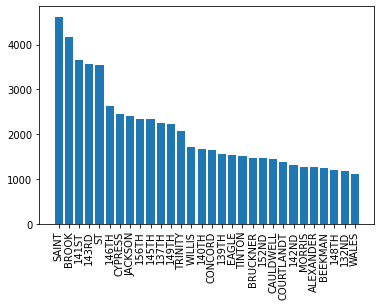

In [179]:
import matplotlib.pyplot as plt
max_points = 30
names = [row[0] for row in popular_streets.collect()][:max_points]
counts = [row[1] for row in popular_streets.collect()][:max_points]
plt.bar(range(max_points), counts, tick_label=names)

plt.xticks(rotation=90)
plt.show()

In [147]:
popular_times = fhv_test.groupBy("TIME").count().sort(desc("count"))
popular_times.show(30)

+-----------+-----+
|       TIME|count|
+-----------+-----+
|      15:00|  184|
|      14:00|  168|
|       9:00|  166|
|       6:00|  157|
|      14:30|  147|
|      11:00|  143|
|      12:00|  143|
|      10:00|  140|
|       8:30|  138|
|      13:00|  134|
|       6:30|  134|
|       8:00|  131|
|       5:00|  127|
|      12:30|  126|
|       9:30|  125|
|      13:30|  125|
|      15:30|  124|
|       7:00|  121|
| 7:39:00 AM|  120|
| 8:49:00 AM|  119|
|       4:30|  118|
|       7:30|  118|
| 7:46:00 AM|  118|
|      10:30|  117|
|       5:30|  116|
|11:22:00 PM|  113|
| 7:45:00 AM|  113|
| 7:37:00 AM|  112|
| 8:48:00 AM|  112|
|10:32:00 PM|  112|
+-----------+-----+
only showing top 30 rows



In [217]:
def uniform_time(t):
    pm = False
    if "PM" in t:
        pm = True
    t = ":".join(t.split(":")[:2])
    if len(t) != 5:
        t = "0"+t
    if pm:
        t = str(int(t[:2])+12)+t[2:]
    return t
regex_udf = udf(lambda x: uniform_time(x))

time_uniform = fhv_test.withColumn("TIME", regex_udf(col("TIME"))).groupBy("TIME").count().sort(desc("count"))
time_uniform.show(10)

+-----+-----+
| TIME|count|
+-----+-----+
|09:00|  269|
|10:00|  246|
|15:00|  245|
|14:00|  223|
|07:30|  222|
|08:30|  221|
|11:00|  221|
|06:00|  216|
|13:00|  216|
|09:30|  213|
+-----+-----+
only showing top 10 rows



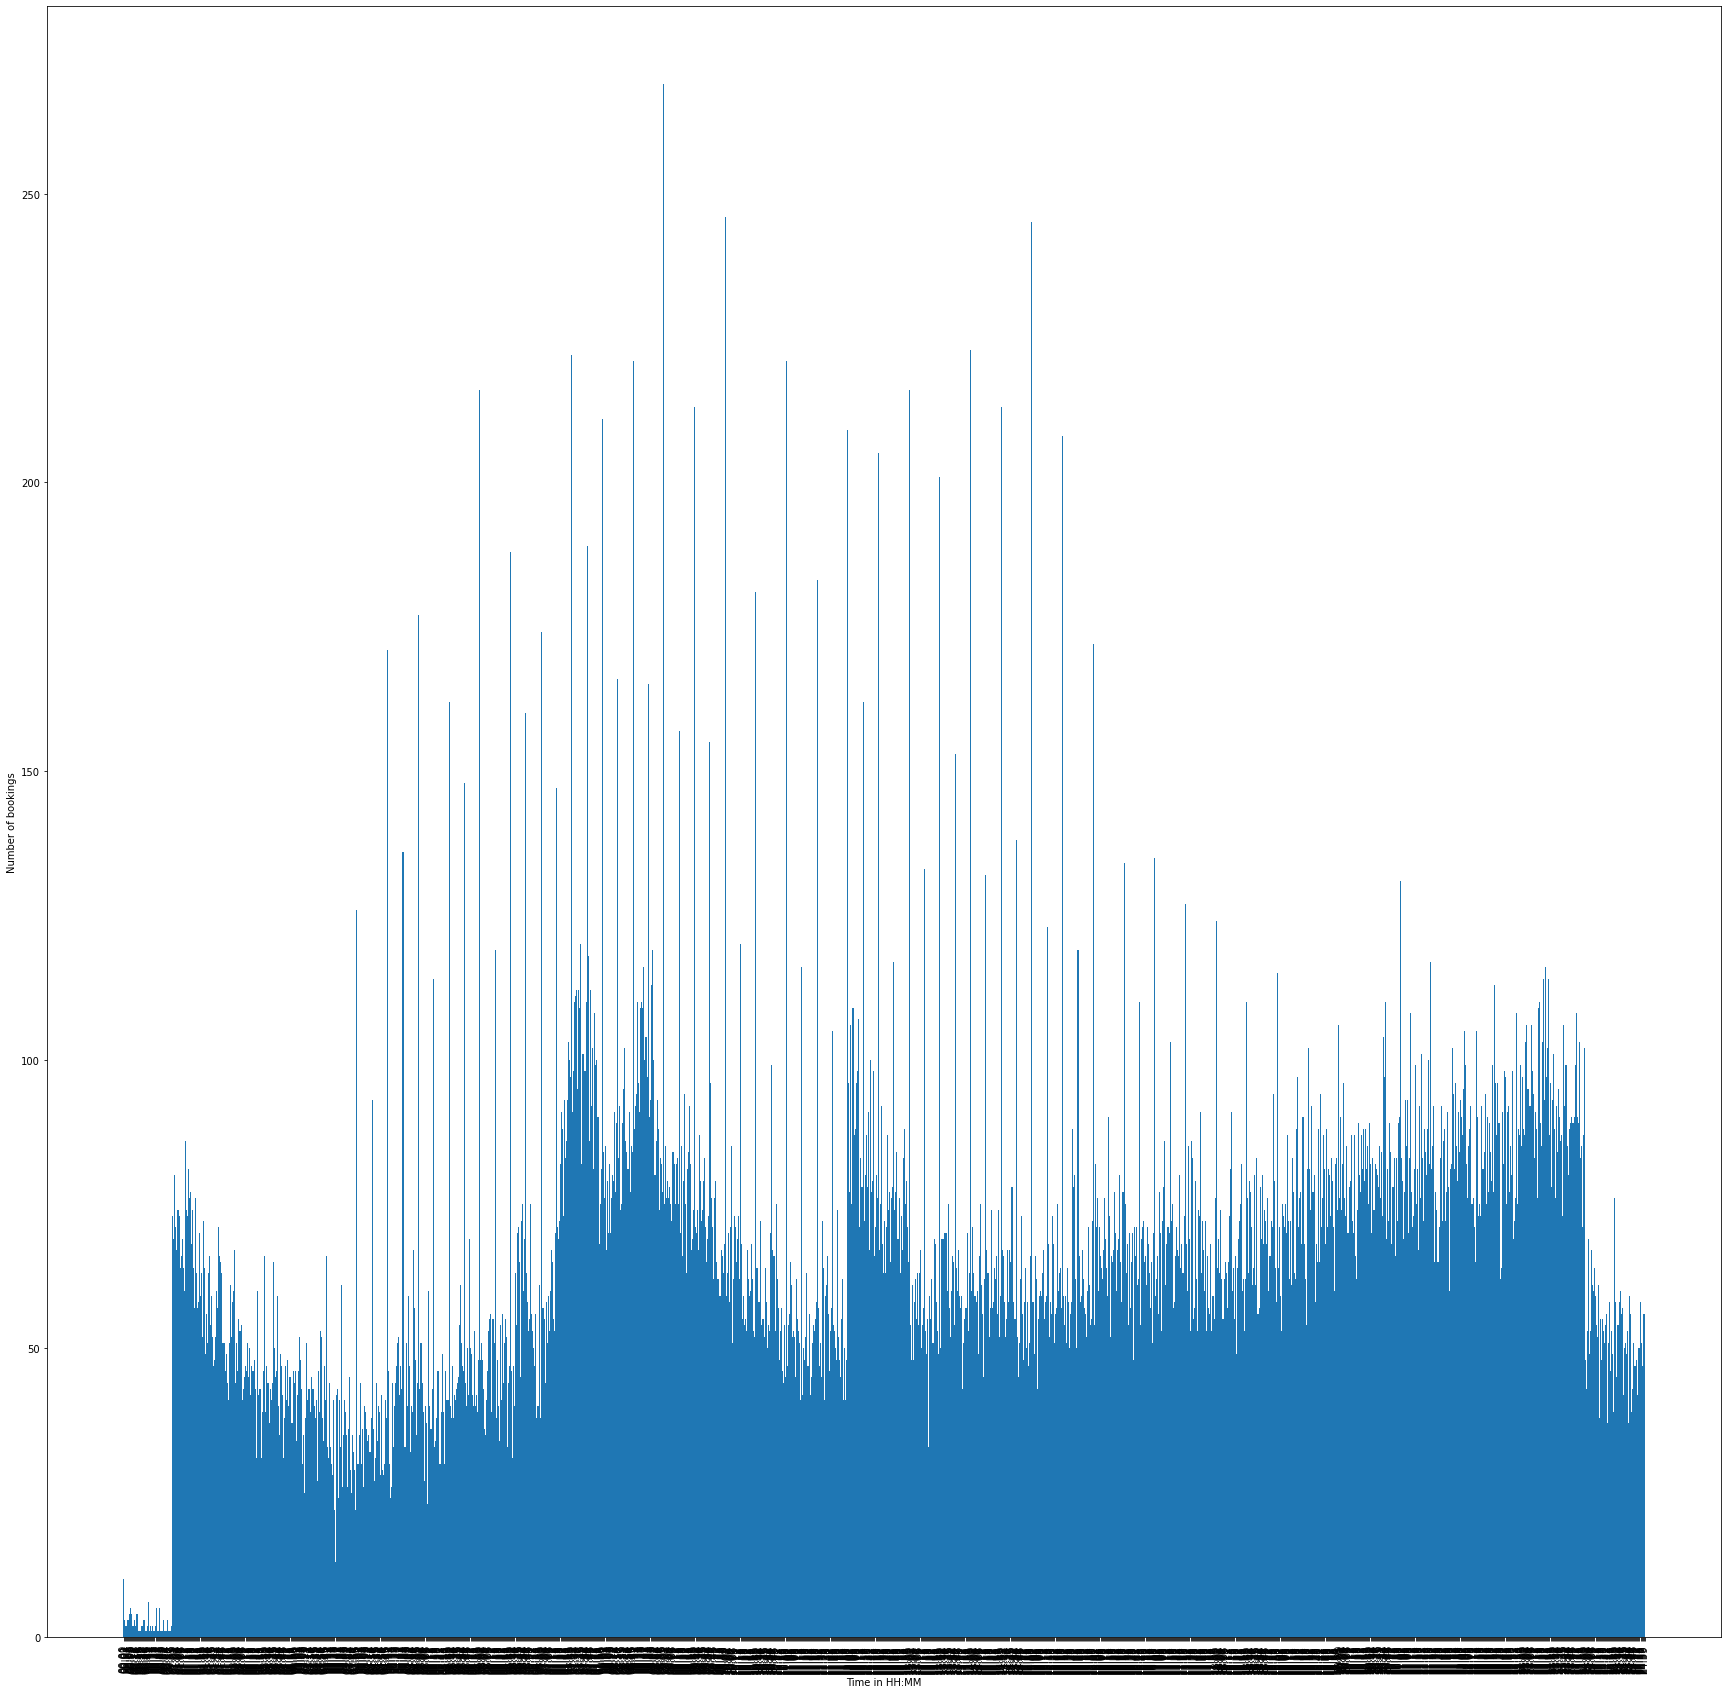

In [219]:
import matplotlib.pyplot as plt
names = [row[0] for row in time_uniform.collect()]
counts = [row[1] for row in time_uniform.collect()]
zipped = list(zip(names, counts))
zipped.sort(key=lambda x: x[0])
names = [e[0] for e in zipped]
counts = [e[1] for e in zipped]
plt.subplots(figsize=(30,30))
plt.bar(range(len(names)), counts, tick_label=names, width=1.0)

plt.ylabel("Number of bookings")
plt.xlabel("Time in HH:MM")
plt.xticks(rotation=90)
plt.show()

In [220]:
def round_time(t):
    pm = False
    if "PM" in t:
        pm = True
    t = ":".join(t.split(":")[:2])
    t = t[:-1]+str(int(t[-1:])//5*5)
    if len(t) != 5:
        t = "0"+t
    if pm:
        t = str(int(t[:2])+12)+t[2:]
    return t
regex_udf = udf(lambda x: round_time(x))
fhv_test.show(10)
time_trunc = fhv_test.withColumn("TIME", regex_udf(col("TIME")))
time_trunc.show(10)

22/03/16 18:38:55 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Date, Time, PU_Address
 Schema: Date, Time, PU_Address5
Expected: PU_Address5 but found: PU_Address
CSV file: file:///home/ubuntu/uber-tlc-foil-response/other-FHV-data/Federal_02216.csv


+--------+-----------+---------------+
|    DATE|       TIME|PICK_UP_ADDRESS|
+--------+-----------+---------------+
|7/1/2014|12:00:00 AM|          139TH|
|7/1/2014|12:01:00 AM|          141ST|
|7/1/2014|12:01:00 AM|          156TH|
|7/1/2014|12:01:00 AM|          138TH|
|7/1/2014|12:02:00 AM|          140TH|
|7/1/2014|12:03:00 AM|          163RD|
|7/1/2014|12:08:00 AM|          150TH|
|7/1/2014|12:10:00 AM|          153RD|
|7/1/2014|12:11:00 AM|          148TH|
|7/1/2014|12:11:00 AM|          141ST|
+--------+-----------+---------------+
only showing top 10 rows



22/03/16 18:38:59 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Date, Time, PU_Address
 Schema: Date, Time, PU_Address5
Expected: PU_Address5 but found: PU_Address
CSV file: file:///home/ubuntu/uber-tlc-foil-response/other-FHV-data/Federal_02216.csv


+--------+-----+---------------+
|    DATE| TIME|PICK_UP_ADDRESS|
+--------+-----+---------------+
|7/1/2014|12:00|          139TH|
|7/1/2014|12:00|          141ST|
|7/1/2014|12:00|          156TH|
|7/1/2014|12:00|          138TH|
|7/1/2014|12:00|          140TH|
|7/1/2014|12:00|          163RD|
|7/1/2014|12:05|          150TH|
|7/1/2014|12:10|          153RD|
|7/1/2014|12:10|          148TH|
|7/1/2014|12:10|          141ST|
+--------+-----+---------------+
only showing top 10 rows



In [204]:
popular_times_trunced = time_trunc.groupBy("TIME").count().sort(desc("count"))
popular_times_trunced.show(20)

+-----+-----+
| TIME|count|
+-----+-----+
|07:30|  632|
|08:30|  605|
|07:45|  597|
|09:00|  584|
|08:45|  580|
|12:00|  563|
|07:35|  548|
|08:00|  523|
|23:20|  522|
|08:40|  521|
|08:35|  515|
|12:30|  507|
|23:15|  496|
|10:00|  496|
|09:30|  495|
|07:50|  490|
|08:15|  490|
|07:40|  489|
|23:05|  483|
|23:40|  481|
+-----+-----+
only showing top 20 rows



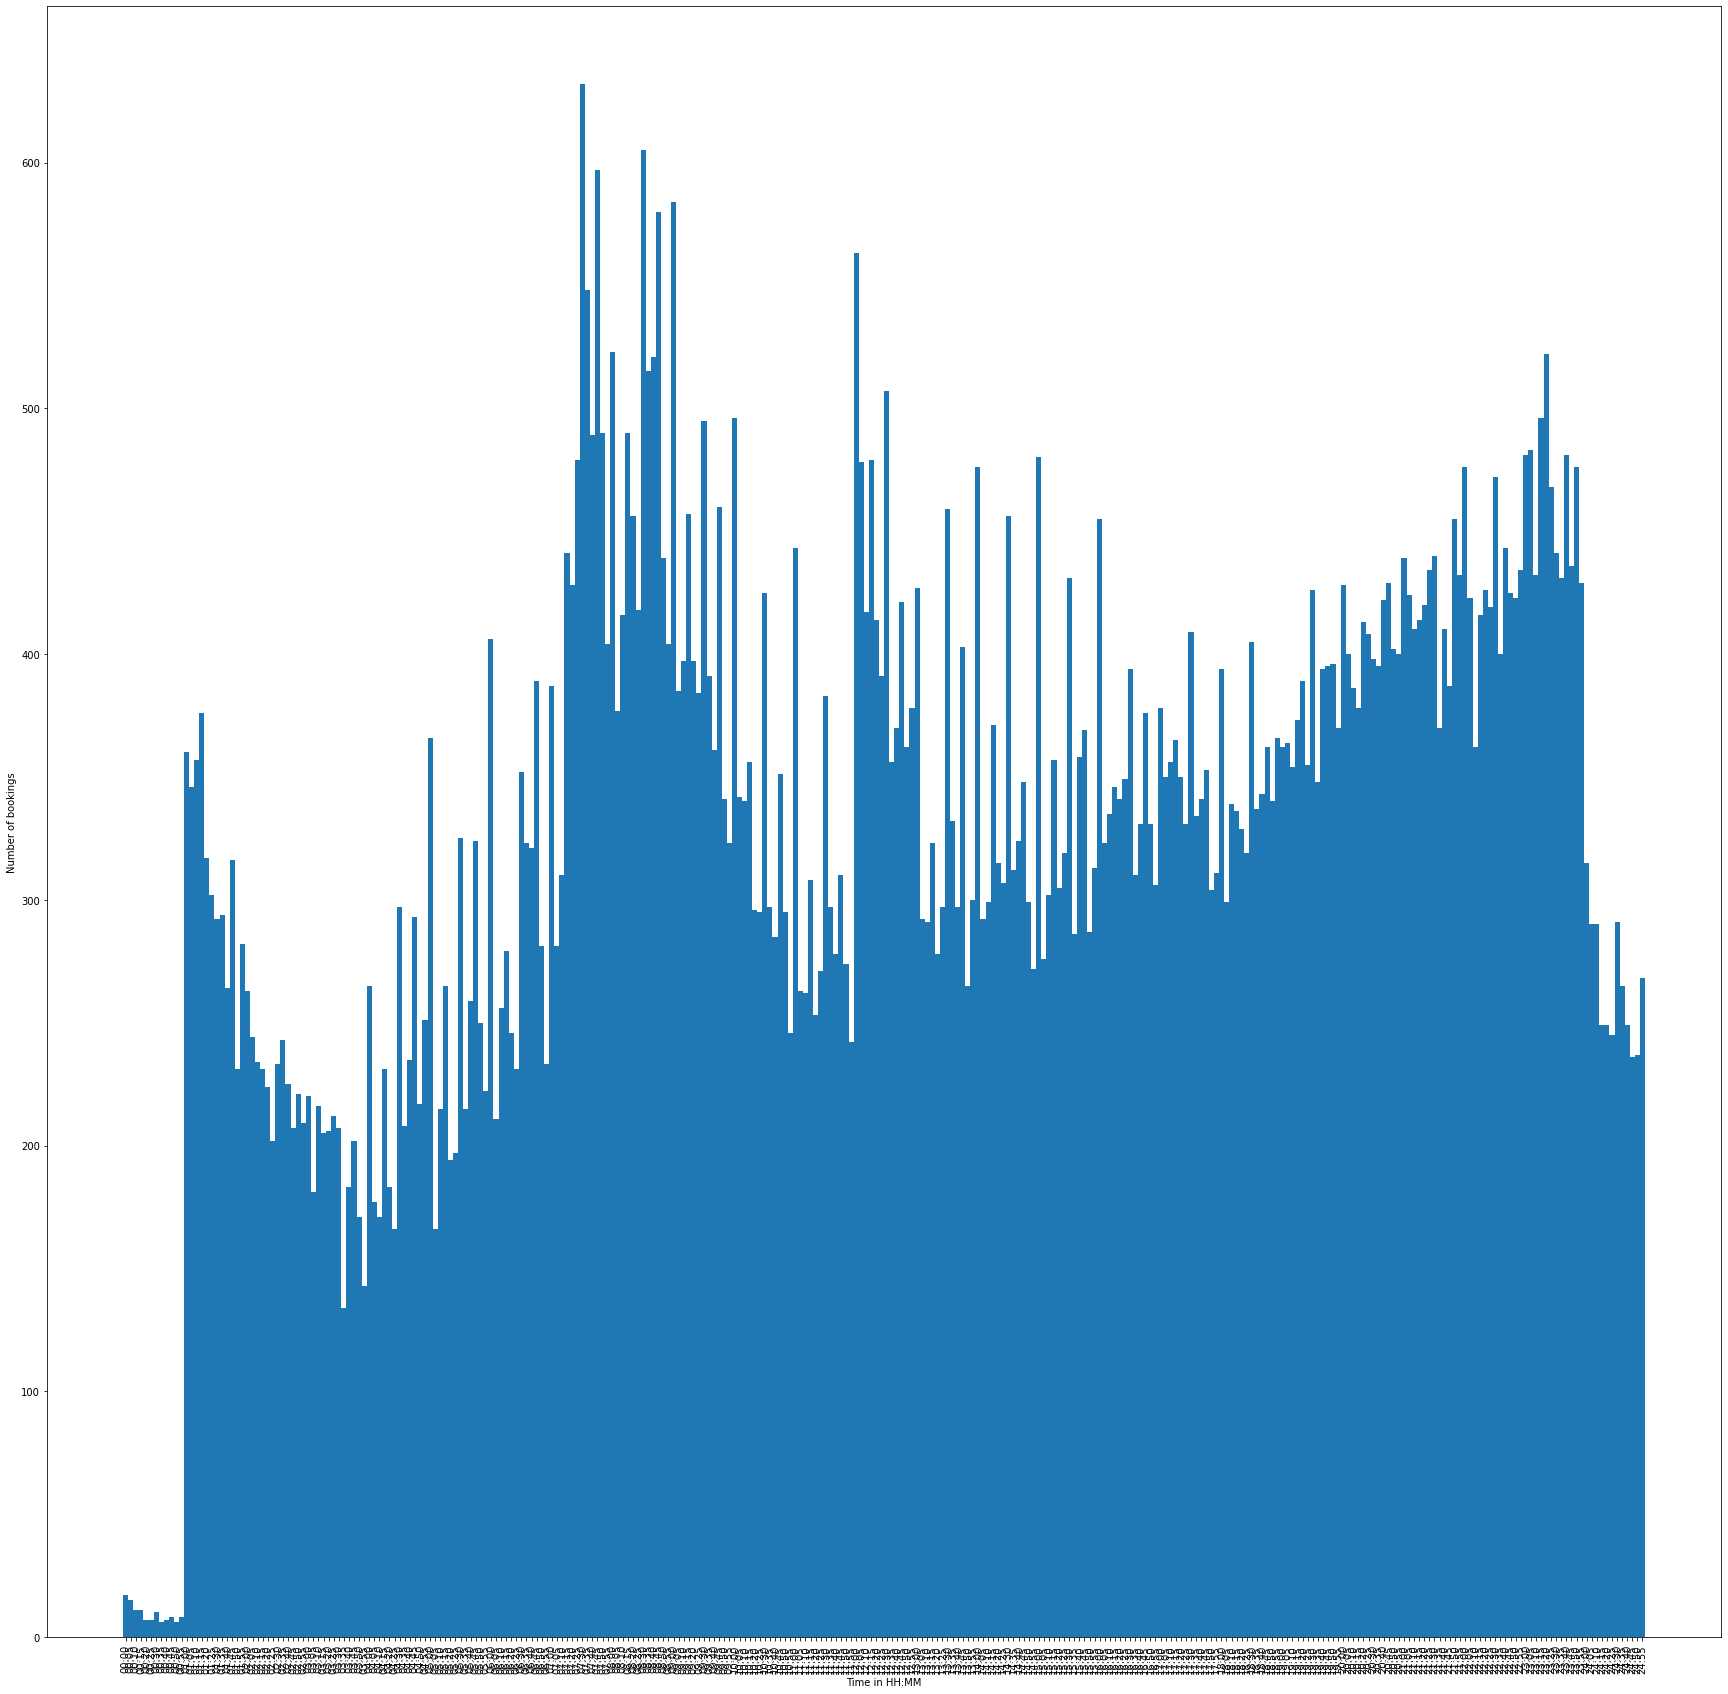

In [211]:
import matplotlib.pyplot as plt
names = [row[0] for row in popular_times_trunced.collect()]
counts = [row[1] for row in popular_times_trunced.collect()]
zipped = list(zip(names, counts))
zipped.sort(key=lambda x: x[0])
names = [e[0] for e in zipped]
counts = [e[1] for e in zipped]
plt.subplots(figsize=(30,30))
plt.bar(range(len(names)), counts, tick_label=names, width=1.0)

plt.ylabel("Number of bookings")
plt.xlabel("Time in HH:MM")
plt.xticks(rotation=90)
plt.show()